## Get the Market caps of the constituents of the S&P 500 index

In [16]:
from datetime import datetime
import os
import shutil
import pandas as pd
import requests

pd.options.mode.chained_assignment = None
from utils import get_sp500_market_weights, calculate_gini_market_weights

### other places to get historical data

https://money.stackexchange.com/questions/49571/historical-stock-data-starting-from-1900

https://www2.census.gov/library/publications/2004/compendia/statab/123ed/hist/hs-38.pdf

https://globalfinancialdata.com/



In [52]:
import seaborn as sns

In [ ]:
# https://www.investopedia.com/terms/g/gini-index.asp
# Country with the highest Gini index is the most unequal. The Gini index is a measure of inequality of a distribution.
# It is South Africa, with a value of 0.63
# As of 2024, the S&P 500 has a Gini index of 0.67
# about two years ago, the S&P 500 had a Gini index of 0.63


In [39]:
import numpy as np
def gini3(x, weights=None):
    if weights is None:
        weights = np.ones_like(x)
    # Calculate mean absolute deviation in two steps, for weights.
    count = np.multiply.outer(weights, weights)
    mad = np.abs(np.subtract.outer(x, x) * count).sum() / count.sum()
    rmad = mad / np.average(x, weights=weights)
    # Gini equals half the relative mean absolute deviation.
    return 0.5 * rmad

In [37]:
import numpy as np

def gini(values):
    values = np.array(values)
    values_sorted = np.sort(values)
    n = len(values)
    cum_values = np.cumsum(values_sorted)
    scale = np.arange(1, n+1)
    gini_index = (2 * np.sum(cum_values * scale)) / (n * np.sum(values)) - (n + 1) / n
    return gini_index


def gini2(array):
    """Calculate the Gini coefficient of a numpy array.

    The Gini coefficient is a measure of statistical dispersion intended to represent the income or wealth distribution of a nation's residents. It is most commonly used as a measure of inequality.

    Args:
        array (numpy.array): A numpy array of values.

    Returns:
        float: The Gini coefficient.
    """

    # Sort the array in ascending order
    array = np.sort(array)

    # Calculate the cumulative sum of the array
    array_sum = np.cumsum(array)

    # Calculate the Gini coefficient
    gini = np.sum((array_sum - (array * (array_sum[-1] / array.sum())))) / (array.sum() * (array.sum() - 1))

    return gini

In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Date to use for snapshot of S&P 500 components.
snap_shot = '2022-10-23'

In [45]:
snap_shot2 = '2024-02-28'
market_weights2, tickers2, missing_tickers2 = get_sp500_market_weights(snap_shot2, verbose=True, stop_at=0)

**************************************** S&P 500 on 2024-02-28 ****************************************
['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH

BF.B: No price data found, symbol may be delisted (1d 2024-01-28 -> 2024-02-28)


No data available for BF.B on 2024-02-28


BRK.B: No timezone found, symbol may be delisted


No data available for BRK.B on 2024-02-28


In [13]:
market_weights, tickers, missing_tickers = get_sp500_market_weights(snap_shot, verbose=True, stop_at=0)

**************************************** S&P 500 on 2022-10-23 ****************************************
['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CV

ABC: No timezone found, symbol may be delisted


No data available for ABC on 2022-10-23
No data available for shares outstanding of ABMD


ATVI: No timezone found, symbol may be delisted


No data available for ATVI on 2022-10-23


BF.B: No price data found, symbol may be delisted (1d 2022-09-23 -> 2022-10-23)


No data available for BF.B on 2022-10-23


BRK.B: No timezone found, symbol may be delisted


No data available for BRK.B on 2022-10-23


DISH: No timezone found, symbol may be delisted


No data available for DISH on 2022-10-23


FBHS: No timezone found, symbol may be delisted


No data available for FBHS on 2022-10-23


FISV: No timezone found, symbol may be delisted


No data available for FISV on 2022-10-23


FRC: No timezone found, symbol may be delisted


No data available for FRC on 2022-10-23


NLOK: No timezone found, symbol may be delisted


No data available for NLOK on 2022-10-23


PKI: No timezone found, symbol may be delisted


No data available for PKI on 2022-10-23


RE: No timezone found, symbol may be delisted


No data available for RE on 2022-10-23


SIVB: No timezone found, symbol may be delisted


No data available for SIVB on 2022-10-23


TWTR: No timezone found, symbol may be delisted


No data available for TWTR on 2022-10-23


In [41]:
def gini4(x, w=None):
    # The rest of the code requires numpy arrays.
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

In [43]:
def gini5(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [46]:
gini5(market_weights2)

0.6672468725153123

Text(0.5, 0, 'Market Weights')

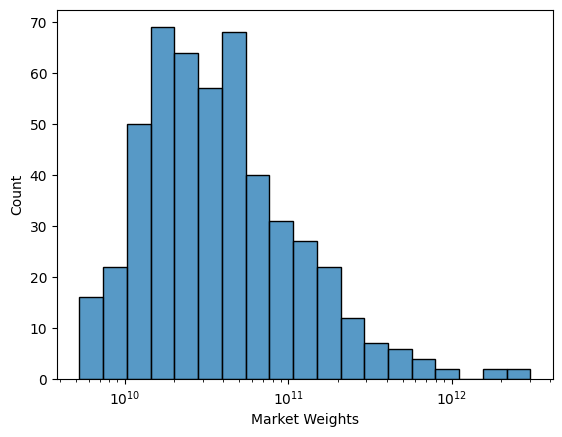

In [54]:
sns.histplot(market_weights2, log_scale=True)
plt.xlabel('Market Weights')

In [44]:
gini5(market_weights)

0.6345702324056406

In [42]:
gini4(market_weights)

0.6345702324056407

In [40]:
gini3(market_weights)

0.6345702324056406

In [36]:
gini(market_weights)

137.03419619417193

In [32]:
np.min(market_weights), np.max(market_weights), np.mean(market_weights), np.median(market_weights)

(3275422823.4596252, 2254865583208.125, 63436911440.146965, 27343446395.109375)

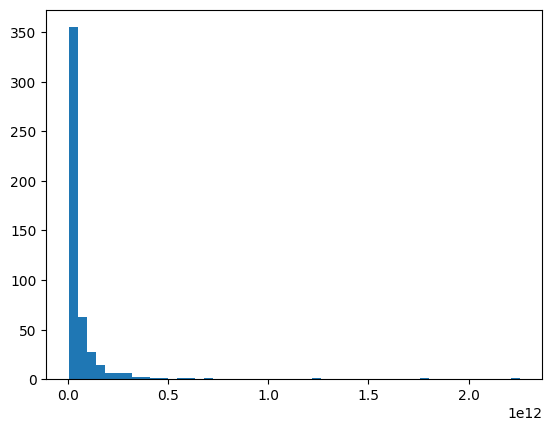

In [34]:
_ = plt.hist(market_weights, bins=50, label='S&P 500')

In [27]:
calculate_gini_market_weights(market_weights)

0.994716283139668

In [15]:
missing_tickers

['ABC',
 'ABMD',
 'ATVI',
 'BF.B',
 'BRK.B',
 'DISH',
 'FBHS',
 'FISV',
 'FRC',
 'NLOK',
 'PKI',
 'RE',
 'SIVB',
 'TWTR']

'2022-10'

In [25]:
# Using Polygon to get stock data
def get_polygon_data(ticker, snap_shot):

    apikey = 'nsyGfUpE71vyC1YNfUJnyjQl7P2Cgd2L'
    url = f'https://api.polygon.io/v3/reference/tickers/{ticker}?date={snap_shot}&apiKey={apikey}'

    r = requests.get(url)
    data = r.json()
    return data

In [26]:
get_polygon_data('ABMD',snap_shot=snap_shot)

{'request_id': 'a0c7aa92f6a2eee0ee6c1cfd1303d0f5',
 'results': {'ticker': 'ABMD',
  'name': 'Abiomed Inc',
  'market': 'stocks',
  'locale': 'us',
  'primary_exchange': 'XNAS',
  'type': 'CS',
  'active': True,
  'currency_name': 'usd',
  'cik': '0000815094',
  'composite_figi': 'BBG000C101X4',
  'share_class_figi': 'BBG001S64SQ9',
  'market_cap': 11647987698.480001,
  'phone_number': '(978) 777-5410',
  'address': {'address1': '22 CHERRY HILL DR',
   'city': 'DANVERS',
   'state': 'MA',
   'postal_code': '01923'},
  'description': "Abiomed Inc provides temporary mechanical circulatory support devices that are primarily used by interventional cardiologists and heart surgeons. The firm's products are used for patients in need of hemodynamic support before, during, or after angioplasty and heart surgery procedures. Abiomed receives the majority of revenue from its Impella product portfolio, which includes percutaneous micro heart pumps with integration motors and sensors and percutaneous

In [23]:
#Using Alpha Vantage API to get the stock data
apikey = 'KAIX495CQF9DWL2G'
ticker = 'ABMD'
month = snap_shot[:-3]
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=60min&month={month}&outputsize=compact&apikey={apikey}'

r = requests.get(url)
data = r.json()

In [24]:
data

{'Error Message': 'Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_INTRADAY.'}

In [14]:
len(market_weights)

489

In [5]:
import yfinance as yf

In [11]:
stock = yf.Ticker('ABMD')

In [12]:
stock.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 381.02,
 'open': 380.78,
 'dayLow': 380.545,
 'dayHigh': 381.28,
 'regularMarketPreviousClose': 381.02,
 'regularMarketOpen': 380.78,
 'regularMarketDayLow': 380.545,
 'regularMarketDayHigh': 381.28,
 'trailingPE': 65.35506,
 'forwardPE': 60.768738,
 'volume': 15702662,
 'regularMarketVolume': 15702662,
 'averageVolume': 1703123,
 'averageVolume10days': 3405113,
 'averageDailyVolume10Day': 3405113,
 'bid': 381.31,
 'ask': 381.5,
 'bidSize': 1000,
 'askSize': 900,
 'marketCap': 17180649472,
 'fiftyTwoWeekLow': 219.845,
 'fiftyTwoWeekHigh': 381.99,
 'fiftyDayAverage': 351.417,
 'twoHundredDayAverage': 291.67477,
 'currency': 'USD',
 'exchange': 'NMS',
 'quoteType': 'EQUITY',
 'symbol': 'ABMD',
 'underlyingSymbol': 'ABMD',
 'shortName': 'ABIOMED, Inc.',
 'longName': 'Abiomed, Inc.',
 'firstTradeDateEpochUtc': 554563800,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': 'a393224e-40ae-3cd2-a2c8-12a0912a9351',

In [7]:
history = stock.history(start='2018-12-01', end='2018-12-31')

ABC: No timezone found, symbol may be delisted


In [ ]:
history['Close'][-1]

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def get_previous_month(date_str):
    date_format = "%Y-%m-%d"
    date_obj = datetime.strptime(date_str, date_format)
    previous_month = date_obj - relativedelta(months=1)
    return previous_month.strftime(date_format)

In [ ]:
get_previous_month(snap_shot)